In [ ]:
# Multiclass calssification model on mnist data using   OnevsRest Classifier approach

In [ ]:
# Multiclass classifiers also called as multinomial classifiers can distinguish 
# between two or more classes

# One vs the rest (one-versus-all)- 10 classes so we build 10 classifiers one for each class
# 1vs all, 2vsall, 3vs all-----10vsall

#one-vs-one strategy- N classes Nx(N-1)/2= 10(9)/2=90/2=45 models

In [ ]:
# MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school
# students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

from sklearn.datasets import fetch_openml

mnist= fetch_openml('mnist_784', as_frame=False)

In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y= mnist.data, mnist.target

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
28*28

784

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

<class 'numpy.ndarray'>
1


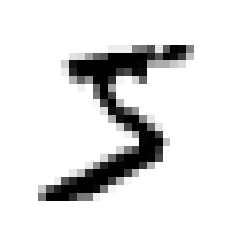

In [ ]:
import matplotlib.pyplot as plt

# 784 in to 28x28

def plot_digit(image_data):
    image= image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
some_digit=X[0]
print(type(some_digit))
print(some_digit.ndim)
plot_digit(some_digit)
plt.show()
    


In [ ]:
y[2]

'4'

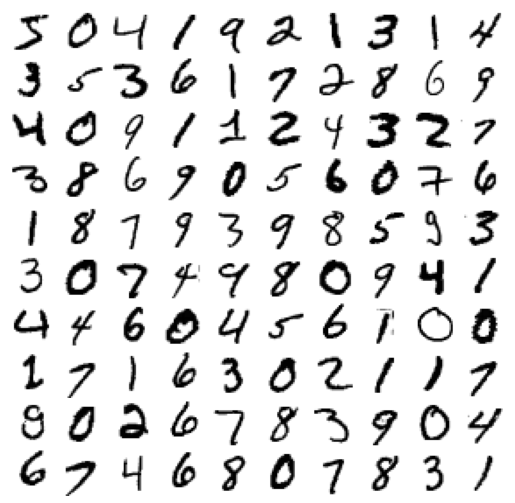

In [ ]:
# more than one image

plt.figure(figsize=(9,9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10,10,idx+1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
# Train and Test split

X_train, X_test, y_train, y_test= X[:60000],X[60000:], y[:60000],y[60000:]

In [ ]:
# Training a Binary classifier

y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [ ]:
# SGD Classifier- StochasticGradientDescent- This classifier can handle very large datasets efficiently

from sklearn.linear_model import SGDClassifier

sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
some_digit=X[1]
sgd_clf.predict([some_digit])

array([False])

In [ ]:
# Performance Measures- Evaluating a classifier if often significantly trickier than
# evaluating a regressor

# Measuring accuracy using Cross-Validation- cross_val_score()

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5,cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
y_train_5[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [ ]:
# A dummy classifier just classifies every single image in the most frequent class,
# in this case the negative class (i.e not a 5)

from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5,cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [ ]:
# confusion matrix

from sklearn.model_selection import cross_val_predict

y_train_pred= cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

round(precision_score(y_train_5, y_train_pred),2)

0.84

In [ ]:
round(recall_score(y_train_5, y_train_pred),2)

0.65

In [ ]:
y_scores= sgd_clf.decision_function([some_digit])
y_scores

array([-5897.37359354])

In [ ]:
threshold=3000

y_some_digit_pred= (y_scores>threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores= cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
# With these scores, use the precision_recall_curve() function to compute precision
# and recall for all possible threshold

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds= precision_recall_curve(y_train_5, y_scores)

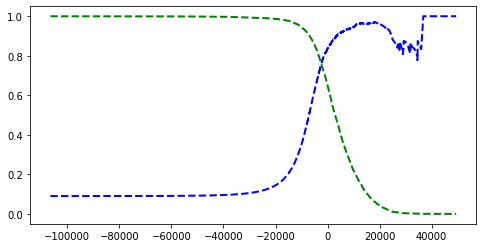

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1],"b--",label="Precision", lw=2)
plt.plot(thresholds, recalls[:-1],"g--",label="Precision", lw=2)
#plt.vlines(threshold, 0,1.0,"k","dotted",label="threshold")
plt.show()

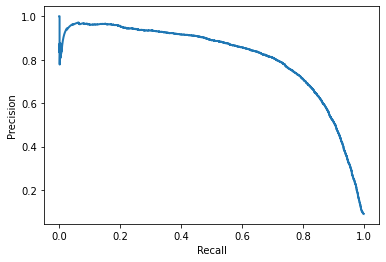

In [ ]:
plt.plot(recalls, precisions, lw=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
# ROC Curve- Receiver Operating Characteristic curve is another common tool used with 
# binary classifiers

# The ROC curve plots the TPR (true positive rate-recall) against the False Positive Rate (FPR- also called as fall-out)
# FPR is the ratio of negative instances that are incorrectly classified as positive
# It is equal to 1-TNR (True Negative Rate)- TNR is also called as specificity
# ROC curve plots sensitivity (recall) versus 1-specificity

from sklearn.metrics import roc_curve

fpr, tpr, thresholds= roc_curve(y_train_5, y_scores)

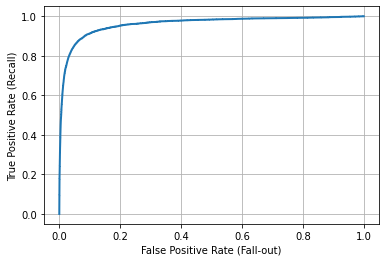

In [ ]:
plt.plot(fpr,tpr, linewidth=2, label="ROC curve")
plt.xlabel("False Positive Rate (Fall-out)")
plt.ylabel("True Positive Rate (Recall)")
plt.grid()
plt.show()

In [ ]:
# One way to compare classifiers is to measure the area under the curve (AUC)
# A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier
# will have a ROC AUC equal to 0.5

from sklearn.metrics import roc_auc_score
round(roc_auc_score(y_train_5, y_scores),2)

0.96

In [ ]:
# Let's now create a Random Forest Classifier and we will compare it PR curve and F1 score
# to those of the SGD classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf= RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest= cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                  method="predict_proba")

In [ ]:
threshold=3000

y_some_digit_pred= (y_scores>threshold)
y_some_digit_pred

array([False, False, False, ...,  True, False, False])

In [ ]:
# How do you decide which threshold to use?

y_scores= cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
# With these scores, use the precision_recall_curve() function to compute precision
# and recall for all possible threshold

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds= precision_recall_curve(y_train_5, y_scores)

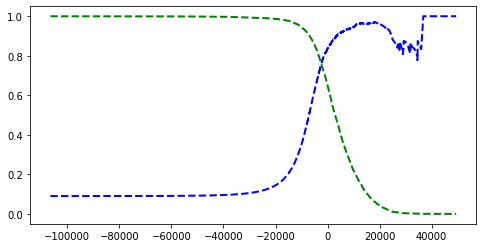

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1],"b--",label="Precision", lw=2)
plt.plot(thresholds, recalls[:-1],"g--",label="Precision", lw=2)
#plt.vlines(threshold, 0,1.0,"k","dotted",label="threshold")
plt.show()

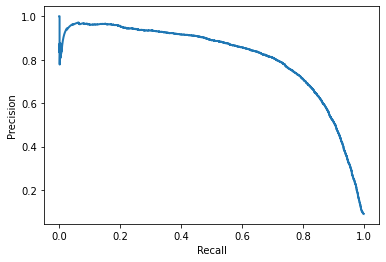

In [ ]:
plt.plot(recalls, precisions, lw=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
# ROC Curve- Receiver Operating Characteristic curve is another common tool used with 
# binary classifiers

# The ROC curve plots the TPR (true positive rate-recall) against the False Positive Rate (FPR- also called as fall-out)
# FPR is the ratio of negative instances that are incorrectly classified as positive
# It is equal to 1-TNR (True Negative Rate)- TNR is also called as specificity
# ROC curve plots sensitivity (recall) versus 1-specificity

from sklearn.metrics import roc_curve

fpr, tpr, thresholds= roc_curve(y_train_5, y_scores)

In [ ]:
# Multiclass Classification

In [ ]:
# Multiclass classifiers also called as multinomial classifiers can distinguish 
# between two or more classes

# One vs the rest (one-versus-all)- 10 classes so we build 10 classifiers one for each class
# 1vs all, 2vsall, 3vs all-----10vsall

In [ ]:
#one-vs-one strategy- N classes Nx(N-1)/2= 10(9)/2=90/2=45 models

In [ ]:
from sklearn.svm import SVC

svm_clf= SVC(random_state=42)

svm_clf.fit(X_train[:2000],y_train[:2000])


SVC(random_state=42)

In [ ]:
svm_clf.predict([some_digit])

array(['0'], dtype=object)

In [ ]:
y_train[1]

'0'

In [ ]:
some_digit_scores= svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 9.31, -0.29,  6.14,  7.21,  0.71,  8.28,  3.8 ,  1.77,  2.77,
         5.11]])

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf= OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['0'], dtype='<U1')

In [ ]:
cross_val_score(sgd_clf, X_train[:2000], y_train[:2000], cv=3, scoring="accuracy")

array([0.84857571, 0.80809595, 0.84084084])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train.astype("float"))
cross_val_score(sgd_clf, X_train_scaled[:2000], y_train[:2000], cv=3, scoring="accuracy")

array([0.84857571, 0.82008996, 0.85885886])

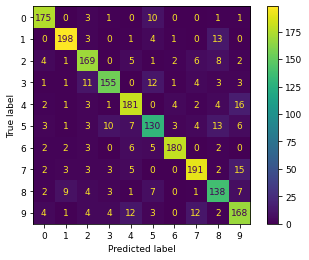

In [ ]:
# Error analysis in the model- confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred= cross_val_predict(sgd_clf, X_train_scaled[:2000], y_train[:2000], cv=3)
plt.rc('font',size=9)
ConfusionMatrixDisplay.from_predictions(y_train[:2000],y_train_pred)
plt.show()

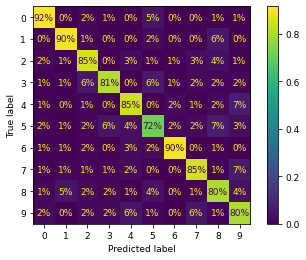

In [ ]:
plt.rc('font',size=9)
ConfusionMatrixDisplay.from_predictions(y_train[:2000],y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [ ]:
# Model Optimization

import numpy as np

np.random.seed(42)
m=100
X= 2*np.random.rand(m,1)
X
y=4+3*X +np.random.randn(m,1)

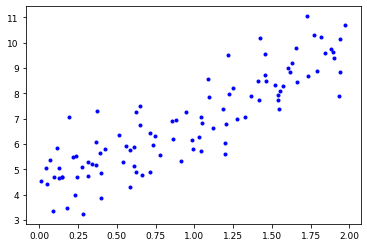

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b= add_dummy_feature(X)
theta_best= np.linalg.inv(X_b.T @ X_b) @X_b.T@y

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
# Gradient Descent- The general idea of Gradient Descent is to tweak parameters
# iteratively in order to minimize cost function

# When using gradient descent, you should ensure that all features have a similar scale
# or else it will take much longer to converge

In [ ]:
eta=0.1 # learning rate
n_epochs=1000
m=len(X_b) # number of instances

np.random.seed(42)
theta=np.random.randn(2,1) # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients= 2/m*X_b.T@(X_b@theta-y)
    theta=theta-eta*gradients

theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
# Stochastic Gradient Descent picks a random instance in the training set at every step
# and computes the gradients based on only that single instance

from sklearn.linear_model import SGDRegressor

#max_iter (1000 epcohs or cycles), tol

sgd_reg=SGDRegressor(max_iter=1000, tol=1e-5, penalty=None,eta0=0.01,
                    n_iter_no_change=100, random_state=42)

sgd_reg.fit(X,y.ravel()) # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

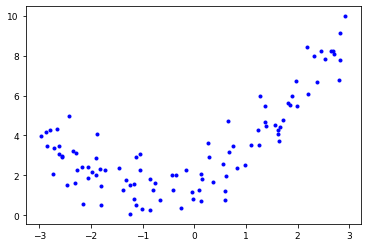

In [ ]:
# Polynomial Regression

np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2 +X +2 +np.random.randn(m,1)

plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features= PolynomialFeatures(degree=2, include_bias=False)

X_poly= poly_features.fit_transform(X)

X[0]

array([-0.75275929])